In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Loading the dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

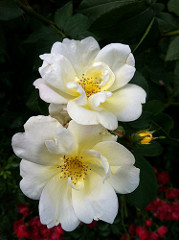

In [8]:
PIL.Image.open(str(roses[0]))

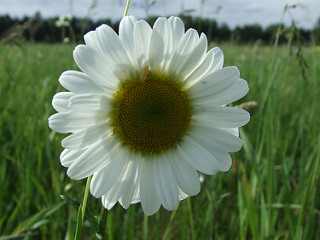

In [9]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[454]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_images_dict['tulips'][:6]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg')]

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))
   

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [18]:
for flower_name, images in flowers_images_dict.items():
      for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [20]:
X=np.array(X)

In [21]:
y=np.array(y)

# Train test split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)

In [23]:
len(X_train)

2569

In [24]:
len(X_test)

1101

In [25]:
len(y_train)

2569

#  Scaled images

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
X_test_scaled[25]

array([[[0.76862745, 0.76862745, 0.76862745],
        [0.89019608, 0.89019608, 0.89019608],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.87843137, 0.87843137, 0.87843137],
        [0.89411765, 0.89411765, 0.89411765],
        [0.65098039, 0.65098039, 0.65098039]],

       [[0.8745098 , 0.8745098 , 0.8745098 ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [0.74509804, 0.74509804, 0.74509804]],

       [[0.86666667, 0.86666667, 0.86666667],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [0.74117647, 0.74117647, 0.74117647]],

       ...,

       [[0.86666667, 0.86666667, 0.86666667],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0

# Building CNN and training it

In [28]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=12)      

Epoch 1/12
81/81 [==============================] - 40s 467ms/step - loss: 1.3708 - accuracy: 0.4391
Epoch 2/12
81/81 [==============================] - 36s 442ms/step - loss: 0.9962 - accuracy: 0.6061
Epoch 3/12
81/81 [==============================] - 40s 501ms/step - loss: 0.8796 - accuracy: 0.6641
Epoch 4/12
81/81 [==============================] - 37s 451ms/step - loss: 0.7294 - accuracy: 0.7322
Epoch 5/12
81/81 [==============================] - 36s 439ms/step - loss: 0.5122 - accuracy: 0.8139
Epoch 6/12
81/81 [==============================] - 34s 422ms/step - loss: 0.3407 - accuracy: 0.8782
Epoch 7/12
81/81 [==============================] - 37s 456ms/step - loss: 0.2457 - accuracy: 0.9198
Epoch 8/12
81/81 [==============================] - 37s 457ms/step - loss: 0.0978 - accuracy: 0.9724
Epoch 9/12
81/81 [==============================] - 35s 431ms/step - loss: 0.0877 - accuracy: 0.9724
Epoch 10/12
81/81 [==============================] - 35s 437ms/step - loss: 0.0396 - accura

In [29]:
model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 3s 95ms/step - loss: 1.8861 - accuracy: 0.6730


[1.8860530853271484, 0.6730245351791382]

# There is overfitting of model

In [30]:
predictions = model.predict(X_test_scaled)
predictions

array([[  6.6249    ,  21.22588   ,   4.7141056 ,  -5.9125957 ,
         -0.31726748],
       [  7.773991  ,  -0.19099368,  -8.939117  ,  -4.7962227 ,
         -0.90249485],
       [  0.21288022,   6.0257454 ,  14.85951   ,  -1.5353541 ,
         -1.3695062 ],
       ...,
       [  0.19802234, -12.984816  ,  -4.264433  ,  -1.570948  ,
         12.102502  ],
       [  3.7609725 ,  10.316402  ,  13.684085  ,  -6.241953  ,
         -1.60369   ],
       [  0.96532875,  18.362768  ,  12.611052  , -15.720963  ,
          7.3285446 ]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

# Improving the accuracy by using data augmentation

In [50]:
data_augmentation = keras.Sequential(
  [
 
    layers.experimental.preprocessing.RandomZoom(0.9),
    layers.experimental.preprocessing.RandomContrast(0.8),
    layers.experimental.preprocessing.RandomRotation(0.5),
  ]
)

# original image

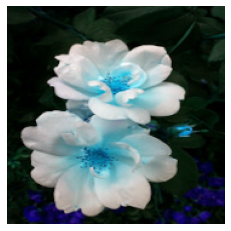

In [51]:
plt.axis('off')
plt.imshow(X[0])

# newly generated sample using data augmentation

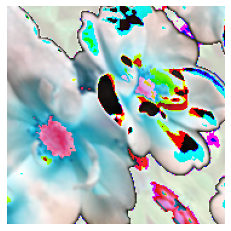

In [52]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [54]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=12)    

Epoch 1/12
81/81 [==============================] - 44s 532ms/step - loss: 1.4219 - accuracy: 0.3939
Epoch 2/12
81/81 [==============================] - 35s 436ms/step - loss: 1.2568 - accuracy: 0.4457
Epoch 3/12
81/81 [==============================] - 39s 485ms/step - loss: 1.1844 - accuracy: 0.5014
Epoch 4/12
81/81 [==============================] - 39s 484ms/step - loss: 1.1568 - accuracy: 0.5228
Epoch 5/12
81/81 [==============================] - 39s 485ms/step - loss: 1.1645 - accuracy: 0.5072
Epoch 6/12
81/81 [==============================] - 39s 483ms/step - loss: 1.1141 - accuracy: 0.5457
Epoch 7/12
81/81 [==============================] - 40s 499ms/step - loss: 1.0771 - accuracy: 0.5574
Epoch 8/12
81/81 [==============================] - 40s 490ms/step - loss: 1.0800 - accuracy: 0.5535
Epoch 9/12
81/81 [==============================] - 40s 489ms/step - loss: 1.0776 - accuracy: 0.5621
Epoch 10/12
81/81 [==============================] - 40s 490ms/step - loss: 1.0601 - accura

In [55]:
model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 5s 121ms/step - loss: 0.8681 - accuracy: 0.6703


[0.8680843710899353, 0.6702997088432312]